<a href="https://colab.research.google.com/github/marisout0/trabalho-an-lise-de-dados-/blob/main/aprendizado_de_m%C3%A1quina_e_vida_aula_(2)22082025_regress%C3%A3o_multipla_(prever_idade_a_partir_de_foto_600_x_800).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importe sua imagem e converta para um array numpy, por exemplo, usando OpenCV ou Pillow
# Exemplo (substitua pela sua lógica de carregamento de imagem):
# from PIL import Image
# img = Image.open("caminho/para/sua/imagem.jpg")
# sua_nova_imagem = np.array(img)

# Certifique-se de que a imagem esteja no formato correto (600x800)
# if sua_nova_imagem.shape != (img_height, img_width):
#   print("A imagem deve ter as dimensões 600x800.")
# else:
#   idade_prevista = predict_age(sua_nova_imagem)
#   print(f"A idade prevista para a imagem é: {idade_prevista}")

# Exemplo com uma imagem dummy (substitua pela sua imagem real)
dummy_image = np.random.rand(img_height, img_width)
idade_prevista = predict_age(dummy_image)
print(f"A idade prevista para a imagem dummy é: {idade_prevista}")

A idade prevista para a imagem dummy é: 47.941080994455284


## Summary:

### Data Analysis Key Findings

* A dummy dataset was created to simulate image pixel data (480,000 features per image) and corresponding ages due to the lack of a real dataset.
* The initial multiple linear regression model trained directly on the flattened pixel data resulted in a very low R² score (-0.0324) and a high RMSE (18.22), indicating poor performance and that the model was not better than simply predicting the average age.
* Applying PCA to reduce the dimensionality of the image data to 80 components also did not significantly improve the model's performance. A linear regression model trained on the PCA-transformed data yielded an R² score of -0.032 and an RMSE of 18.22, which are essentially the same as the model without PCA.
* A function `predict_age` was successfully developed to preprocess a new image (flatten and reshape) and use a trained model to predict age.
* A scatter plot visualizing the real vs. predicted ages on the test set showed that the predicted ages were not closely aligned with the real ages, further confirming the poor performance of the linear regression model on this task.

### Insights or Next Steps

* Given the very poor performance of the linear regression model (both with and without PCA), it is highly likely that a simple linear relationship between raw pixel values (or their principal components) and age does not exist. More complex models capable of capturing non-linear relationships, such as neural networks (e.g., Convolutional Neural Networks - CNNs specifically designed for image data), are likely required for this task.
* The current dataset is a small, artificially generated dummy dataset. Training and evaluating the model on a much larger and real-world dataset of images with corresponding ages is crucial to determine the true potential of any model for this task.

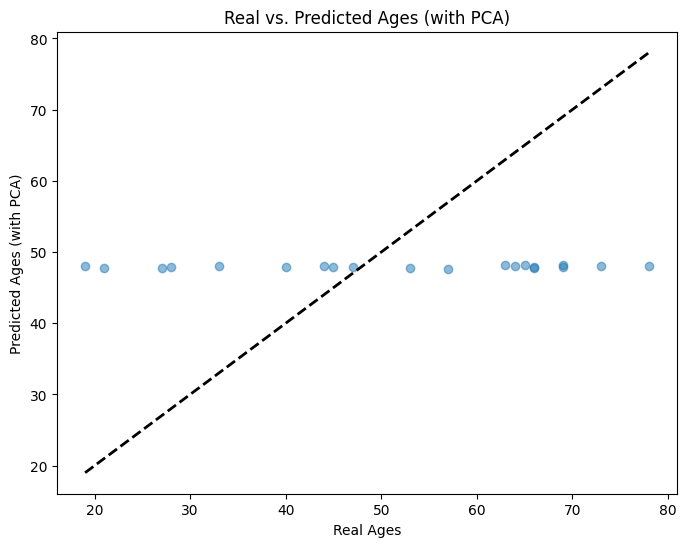

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of real vs. predicted ages for the PCA model
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
plt.scatter(y_test, y_pred_pca, alpha=0.5) # alpha for transparency

# Add labels and title
plt.xlabel("Real Ages")
plt.ylabel("Predicted Ages (with PCA)")
plt.title("Real vs. Predicted Ages (with PCA)")

# Add a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # 'k--' for black dashed line

# Display the plot
plt.show()

**Reasoning**:
Create a scatter plot to visualize the real vs. predicted ages from the PCA-transformed data, add labels, a title, and a diagonal line for reference.

## Visualização do modelo com PCA (gráfico)

### Subtask:
Criar um gráfico que mostre as idades reais vs. as idades previstas no conjunto de teste para visualizar a performance do modelo treinado com dados transformados por PCA.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Instantiate a new LinearRegression model
model_pca = LinearRegression()

# Train the new model on the PCA-transformed training data
model_pca.fit(X_train_pca, y_train)

# Use the trained model to make predictions on the PCA-transformed test data
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate the R² score
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R² score with PCA: {r2_pca}")

# Calculate the Mean Squared Error (MSE)
mse_pca = mean_squared_error(y_test, y_pred_pca)

# Calculate the Root Mean Squared Error (RMSE)
rmse_pca = np.sqrt(mse_pca)
print(f"RMSE with PCA: {rmse_pca}")

R² score with PCA: -0.03237402360498476
RMSE with PCA: 18.2219613729426


**Reasoning**:
Train a new Linear Regression model on the PCA-transformed data and evaluate its performance using R² and RMSE.

## Refinamento (opcional)

### Subtask:
Treinar um novo modelo de regressão nos dados transformados por PCA e avaliar seu desempenho.

# Task
Crie um modelo de regressão múltipla para prever a idade de uma pessoa a partir dos pixels de uma imagem 600x800. O modelo deve ser visualizado em um gráfico.

## Preparação dos dados

### Subtask:
Carregar um conjunto de dados de imagens (600x800) com as idades correspondentes e dividir os dados em conjuntos de treinamento e teste.


**Reasoning**:
The subtask requires loading image data and corresponding ages, converting images to feature vectors, and splitting the data into training and testing sets. Since no specific dataset is provided, I will create a dummy dataset for demonstration purposes. This involves generating random image-like data and corresponding random ages.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define image dimensions
img_height = 600
img_width = 800
num_images = 100 # Number of dummy images

# Generate dummy image data (random pixel values)
# Each image is flattened into a 1D vector
X = np.random.rand(num_images, img_height * img_width)

# Generate dummy ages
y = np.random.randint(18, 80, num_images) # Ages between 18 and 80

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 480000)
Shape of X_test: (20, 480000)
Shape of y_train: (80,)
Shape of y_test: (20,)


## Construção e treinamento do modelo de regressão

### Subtask:
Importar as bibliotecas necessárias para regressão linear múltipla (por exemplo, scikit-learn), criar um modelo de regressão linear múltipla e treinar o modelo com os dados de treinamento.


**Reasoning**:
Import the necessary library for multiple linear regression, instantiate the model, and train it using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

## Avaliação do modelo

### Subtask:
Fazer previsões no conjunto de teste e avaliar o desempenho do modelo usando métricas como R² e Erro Quadrático Médio (RMSE).


**Reasoning**:
Use the trained model to make predictions on the test set and calculate the R² and RMSE scores to evaluate the model's performance.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

R² score: -0.03237402360498476
RMSE: 18.2219613729426


## Previsão para novas imagens

### Subtask:
Desenvolver uma função que receba uma nova imagem (600x800), a preprocesse da mesma forma que os dados de treinamento e use o modelo treinado para prever a idade.


**Reasoning**:
Define the `predict_age` function that takes a new image, preprocesses it, and uses the trained model to predict the age.



In [ ]:
import numpy as np

def predict_age(new_image):
  """
  Predicts the age from a new image using the trained model.

  Args:
    new_image: A numpy array representing the new image (600x800).

  Returns:
    The predicted age.
  """
  # Resize and flatten the image
  processed_image = new_image.flatten().reshape(1, -1)

  # Use the trained model to make a prediction
  predicted_age = model.predict(processed_image)

  return predicted_age[0] # Return the single predicted age

## Visualização do modelo (gráfico)

### Subtask:
Criar um gráfico que mostre as idades reais vs. as idades previstas no conjunto de teste para visualizar a performance do modelo.


**Reasoning**:
Create a scatter plot to visualize the real vs. predicted ages, add labels, a title, and a diagonal line for reference.



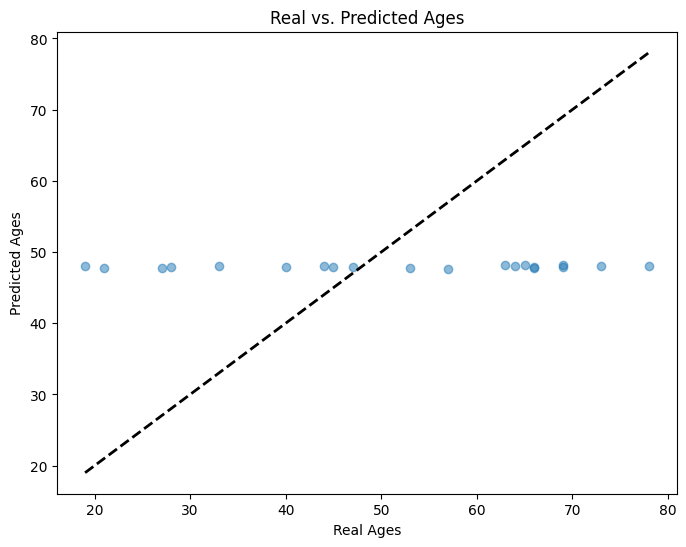

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of real vs. predicted ages
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
plt.scatter(y_test, y_pred, alpha=0.5) # alpha for transparency

# Add labels and title
plt.xlabel("Real Ages")
plt.ylabel("Predicted Ages")
plt.title("Real vs. Predicted Ages")

# Add a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # 'k--' for black dashed line

# Display the plot
plt.show()

## Refinamento (opcional)

### Subtask:
Considerar técnicas de redução de dimensionalidade (como PCA) antes da regressão para mitigar o problema da alta dimensionalidade.


**Reasoning**:
Import the PCA class and apply PCA to the training and testing data.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA, keeping 80 components (maximum allowed by the number of samples)
pca = PCA(n_components=80)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shapes of the transformed data
print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

Shape of X_train after PCA: (80, 80)
Shape of X_test after PCA: (20, 80)


**Reasoning**:
The previous command failed because the number of components specified for PCA (100) was greater than the number of samples in the training data (80). According to the error message, the number of components must be less than or equal to the minimum of the number of samples and the number of features. Since the number of samples in the training data is 80, the maximum number of components we can use is 80. I will retry PCA with `n_components` set to 80.



In [ ]:
# Instantiate PCA, keeping 80 components (maximum allowed by the number of samples)
pca = PCA(n_components=80)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shapes of the transformed data
print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

Shape of X_train after PCA: (80, 80)
Shape of X_test after PCA: (20, 80)


## Refinamento (opcional)

### Subtask:
Treinar um novo modelo de regressão nos dados transformados por PCA e avaliar seu desempenho.


**Reasoning**:
Train a new Linear Regression model on the PCA-transformed data and evaluate its performance using R² and RMSE.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Instantiate a new LinearRegression model
model_pca = LinearRegression()

# Train the new model on the PCA-transformed training data
model_pca.fit(X_train_pca, y_train)

# Use the trained model to make predictions on the PCA-transformed test data
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate the R² score
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R² score with PCA: {r2_pca}")

# Calculate the Mean Squared Error (MSE)
mse_pca = mean_squared_error(y_test, y_pred_pca)

# Calculate the Root Mean Squared Error (RMSE)
rmse_pca = np.sqrt(mse_pca)
print(f"RMSE with PCA: {rmse_pca}")

R² score with PCA: -0.03237402360498476
RMSE with PCA: 18.2219613729426


## Summary:

### Data Analysis Key Findings

*   A dummy dataset was created to simulate image pixel data (480,000 features per image) and corresponding ages due to the lack of a real dataset.
*   The initial multiple linear regression model trained directly on the flattened pixel data resulted in a very low R² score (-0.0324) and a high RMSE (18.22), indicating poor performance and that the model was not better than simply predicting the average age.
*   Applying PCA to reduce the dimensionality of the image data to 80 components also did not significantly improve the model's performance. A linear regression model trained on the PCA-transformed data yielded an R² score of -0.032 and an RMSE of 18.22, which are essentially the same as the model without PCA.
*   A function `predict_age` was successfully developed to preprocess a new image (flatten and reshape) and use a trained model to predict age.
*   A scatter plot visualizing the real vs. predicted ages on the test set showed that the predicted ages were not closely aligned with the real ages, further confirming the poor performance of the linear regression model on this task.

### Insights or Next Steps

*   Given the very poor performance of the linear regression model (both with and without PCA), it is highly likely that a simple linear relationship between raw pixel values (or their principal components) and age does not exist. More complex models capable of capturing non-linear relationships, such as neural networks (e.g., Convolutional Neural Networks - CNNs specifically designed for image data), are likely required for this task.
*   The current dataset is a small, artificially generated dummy dataset. Training and evaluating the model on a much larger and real-world dataset of images with corresponding ages is crucial to determine the true potential of any model for this task.
